In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('all_irvine_thefts_final.csv')

In [3]:
file.head(1)

,DR,Date,Month,Year,Block,Type,Week_Num,Number,Street,Address,Lat,Lon,Type_Num
0,1100034,2011-01-01,1,2011,CAPSTONE / RIVERSTONE ...,Vehicle,1,0,CAPSTONE / RIVERSTONE,"0 CAPSTONE / RIVERSTONE, Irvine, CA",33.700425,-117.796927,0


In [4]:
file.Type.value_counts()

Vehicle    4218
Garage     1203
Package     969
Name: Type, dtype: int64

In [5]:
vehicle = []
garage = []
package = []
lists = [vehicle, garage, package]
counter=0
for type in ['Vehicle', 'Garage', 'Package']:
    df = file[file.Type == type]
    for year in file.Year.unique():
        count = df[df.Year == year].shape[0]
        lists[counter].append(count)
    counter += 1

In [6]:
thefts = pd.DataFrame({'Year':file.Year.unique(), 'Vehicle':vehicle, 'Garage':garage, 'Package':package})
thefts

,Year,Vehicle,Garage,Package
0,2011,435,101,60
1,2012,448,127,44
2,2013,344,151,61
3,2014,305,120,68
4,2015,630,137,148
5,2016,607,157,151
6,2017,591,121,168
7,2018,600,209,176
8,2019,258,80,93


Plotting via Altair:

In [7]:
type_df = pd.DataFrame()
for theft_type in ['Vehicle', 'Garage', 'Package']:
    df = file[file.Type == theft_type]
    counts = []
    for year in file.Year.unique():
        counts.append(df[df.Year == year].shape[0])
    temp_df = pd.DataFrame({'Year':file.Year.unique(), 'Type':np.full(len(file.Year.unique()), theft_type), 'Count':counts})
    type_df = pd.concat([type_df, temp_df])

In [8]:
type_df

,Year,Type,Count
0,2011,Vehicle,435
1,2012,Vehicle,448
2,2013,Vehicle,344
3,2014,Vehicle,305
4,2015,Vehicle,630
5,2016,Vehicle,607
6,2017,Vehicle,591
7,2018,Vehicle,600
8,2019,Vehicle,258
0,2011,Garage,101


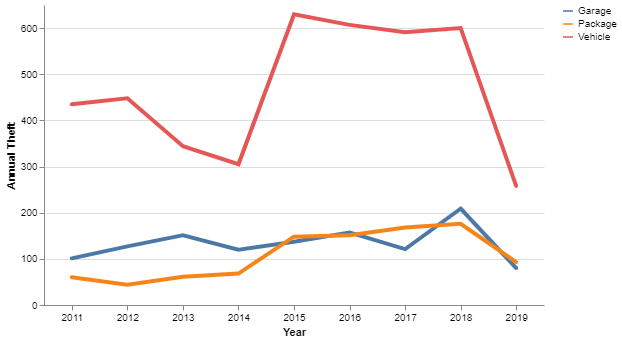

In [9]:
alt.Chart(type_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
x=alt.X('Year:O'),
y=alt.Y('Count', title='Annual Theft'),
color=alt.Color('Type', title=None)).properties(background='White', width=500).configure_view(strokeWidth=0)

*Note: 2019 data is only through May

Layered Bar Chart:

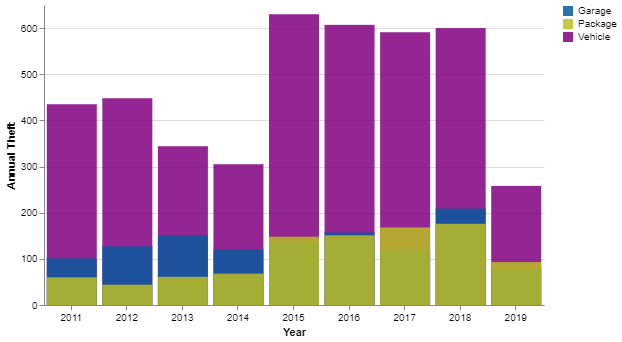

In [10]:
alt.Chart(type_df).configure_axis(labelAngle=0).mark_bar(opacity=.85).encode(
x=alt.X('Year:O'),
y=alt.Y('Count', title='Annual Theft', stack=None),
color=alt.Color('Type', title=None, scale=alt.Scale(range=['#08589e', '#bcbd22', 'purple']))).properties(background='White', width=500).configure_view(strokeWidth=0)

Grouped Bar Chart:

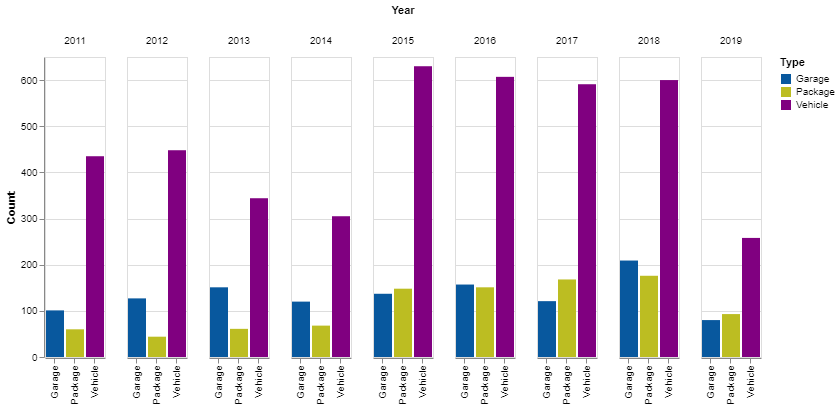

In [11]:
chart = alt.Chart(type_df).mark_bar().encode(
   column=alt.Column('Year'),
   x=alt.X('Type', title=None),
   y=alt.Y('Count'),
   color=alt.Color('Type', scale=alt.Scale(range=['#08589e', '#bcbd22', 'purple'])))

chart.properties(background='white')